# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [5]:
colours = pd.read_csv("data/colors.csv")

In [20]:
colours.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [24]:
colours.shape

(135, 4)

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [27]:
colours.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [28]:
colours.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src=https://i.imgur.com/aKcwkSx.png>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src=https://i.imgur.com/whB1olq.png>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [37]:
sets = pd.read_csv("data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [39]:
by_year = sets.sort_values("year")
by_year.head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [55]:
by_year.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
1956,13,13,13,13
1957,20,20,20,20
1958,46,46,46,46
1959,4,4,4,4


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [46]:
by_pieces = sets.sort_values("num_parts")
by_pieces.tail()

,set_num,name,year,theme_id,num_parts
221,10189-1,Taj Mahal,2008,673,5922
295,10256-1,Taj Mahal,2017,673,5923
10551,71043-1,Hogwarts Castle,2018,246,6020
11183,75192-1,UCS Millennium Falcon,2017,171,7541
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [47]:
by_year.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
1956,13,13,13,13
1957,20,20,20,20
1958,46,46,46,46
1959,4,4,4,4


In [56]:
by_year.groupby("year").count()["set_num"]

year
1949      5
1950      6
1953      4
1954     14
1955     28
1956     13
1957     20
1958     46
1959      4
1960      3
1961     22
1962     41
1963     20
1964     18
1965     13
1966    111
1967     28
1968     39
1969     81
1970     37
1971     51
1972     39
1973     70
1974     39
1975     39
1976     76
1977     99
1978     78
1979     92
1980    102
       ... 
1992    135
1993    137
1994    164
1995    175
1996    198
1997    255
1998    381
1999    340
2000    367
2001    383
2002    504
2003    441
2004    395
2005    351
2006    313
2007    315
2008    341
2009    421
2010    435
2011    503
2012    607
2013    605
2014    690
2015    774
2016    757
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

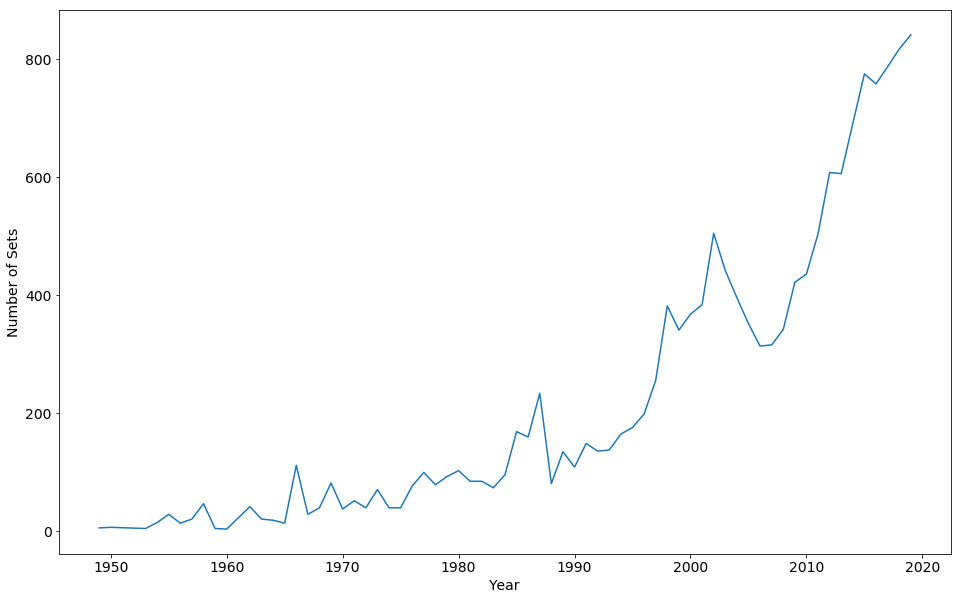

In [63]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)


plt.plot(by_year.groupby("year").count()["set_num"][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [65]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [66]:
themes_by_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

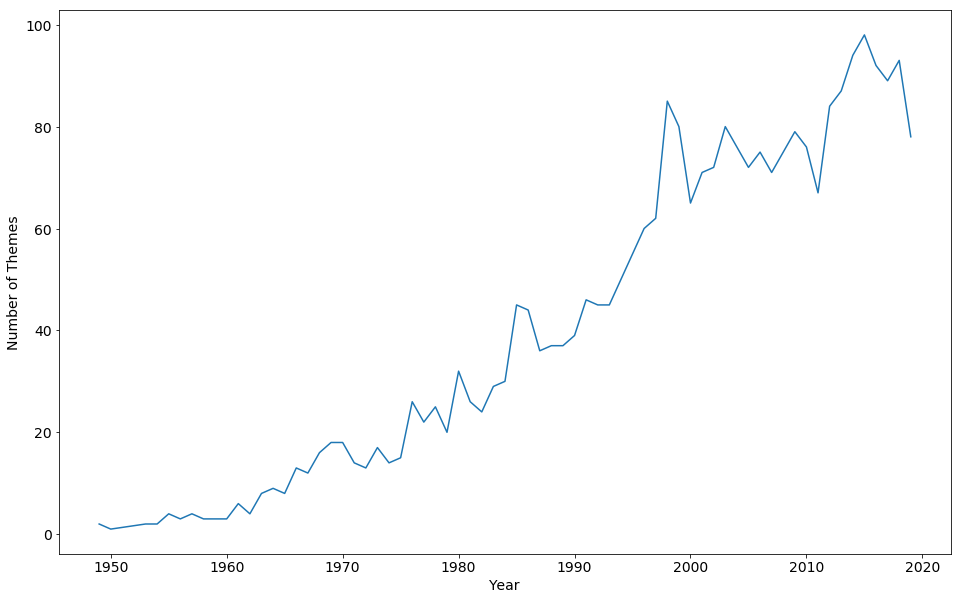

In [69]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Themes', fontsize=14)


plt.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

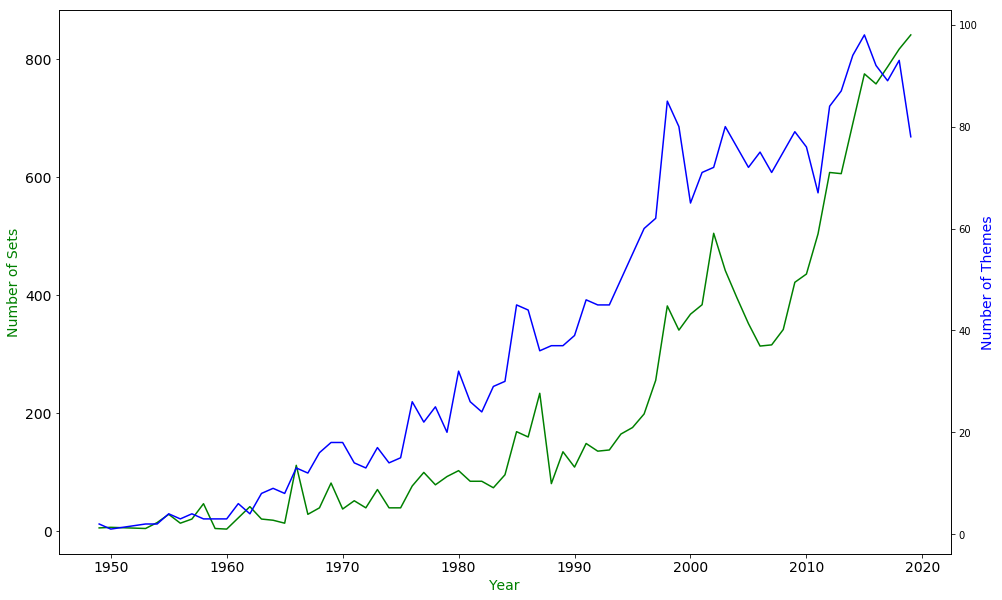

In [76]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14, color="g")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Number of Sets', fontsize=14, color="g")
ax2.set_ylabel('Number of Themes', fontsize=14, color="b")

ax1.plot(by_year.groupby("year").count()["set_num"][:-2], color="g")
ax2.plot(themes_by_year[:-2], color="b")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [81]:
parts_by_year = sets.groupby("year").agg({"num_parts": pd.Series.mean})
parts_by_year.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


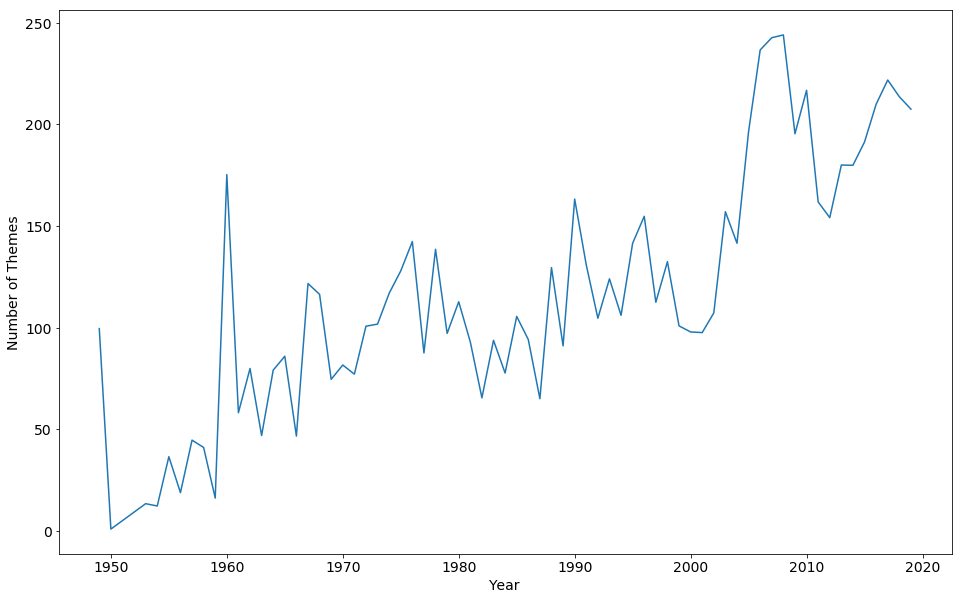

In [80]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Themes', fontsize=14)

plt.plot(parts_by_year[:-2])

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

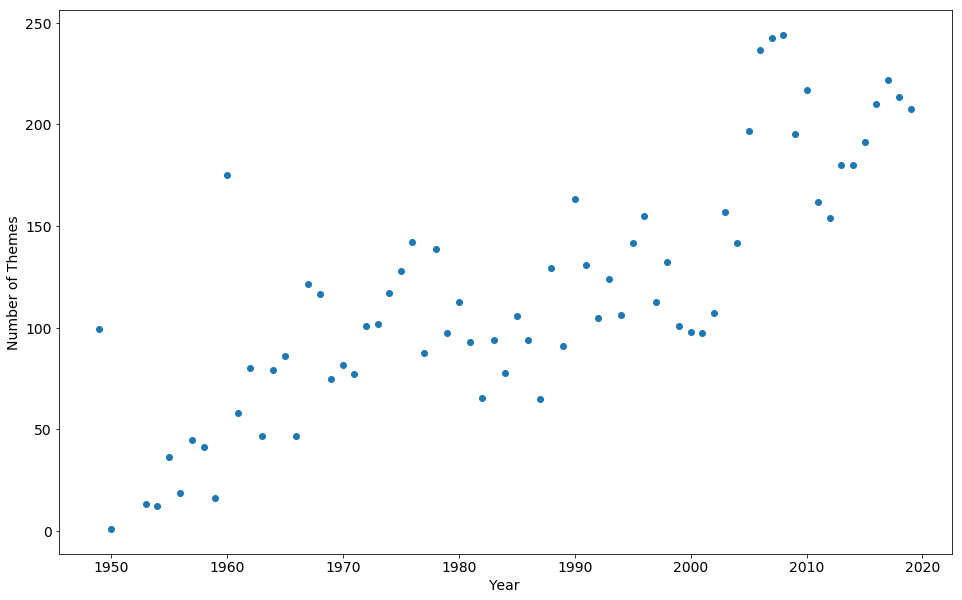

In [85]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Themes', fontsize=14)

plt.scatter(parts_by_year.index[:-2], parts_by_year[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [86]:
themes = pd.read_csv("data/themes.csv")

<img src=https://i.imgur.com/Sg4lcjx.png>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [87]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [88]:
themes.groupby("name").count()

,id,parent_id
name,,
12V,2,2
4 Juniors,1,0
4.5V,2,2
9V,2,2
Action Wheelers,1,1
Advent,1,1
Adventurers,3,2
Agents,1,0
Agori,1,1


### Merging (i.e., Combining) DataFrames based on a Key


In [91]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [92]:
set_theme_count = pd.DataFrame({"id":set_theme_count.index, 
                                "set_count": set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [93]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

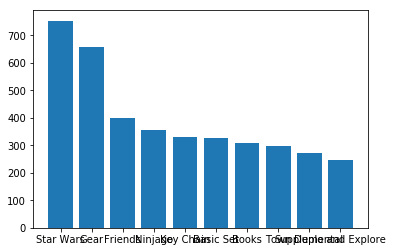

In [94]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

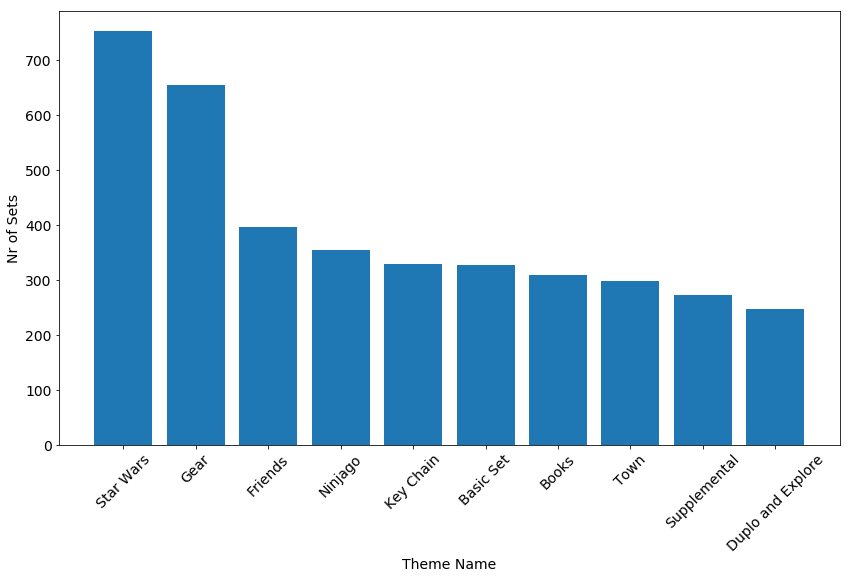

In [95]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Theme Name", fontsize=14)
plt.ylabel("Nr of Sets", fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])